<a href="https://colab.research.google.com/github/patelmedha/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STROKE PREDICTION

In [1]:
#Imports
## Pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Numpy
import numpy as np

##Seaborn
import seaborn as sns

##Matplotlib
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(transform_output='pandas')

# Stroke Prediction
**Context**
  - According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
  

1. Source of data
  - Source : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data
 - - This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

3. What is the target?
  - Target column is stroke. Predicting whether patient will suffer from a stroke or not.
   

4. What does one row represent? (A person? A business? An event? A product?)

    - **Attribute Information**
  1. id: unique identifier
  2. gender: "Male", "Female" or "Other"
  3. age: age of the patient
  4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
  5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
  6. ever_married: "No" or "Yes"
  7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
  8. Residence_type: "Rural" or "Urban"
  9. avg_glucose_level: average glucose level in blood
  10. bmi: body mass index
  11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
  12. stroke: 1 if the patient had a stroke or 0 if not
  
  *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

5. Is this a classification or regression problem?
  - Classification problem

6. How many features does the data have?
  - 11 features

7. How many rows are in the dataset?
  - 5110 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - This data  has 201 missing values in the BMI column.

## Load Data and Inspect Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_stroke = pd.read_csv('/content/drive/MyDrive/CodingDojo/PROJECT 2/healthcare-dataset-stroke-data.csv')

In [6]:
#Load Data
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#Display number of rows and columns for the dataframe
print(f'There are {df_stroke.shape[0]} rows, and {df_stroke.shape[1]} columns.')
print(f'The rows represent {df_stroke.shape[0]} observations, and the columns represent {df_stroke.shape[1]-1} features and 1 target variable.')


There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [8]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Duplicated Data

In [9]:
#Duplicate Rows
df_stroke.duplicated().sum().sum()

0

- There are no duplicate rows to drop.

### Missing Values

In [10]:
#Missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#Missing Values in Percent
df_stroke.isna().sum()/100

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  2.01
smoking_status       0.00
stroke               0.00
dtype: float64

<Axes: >

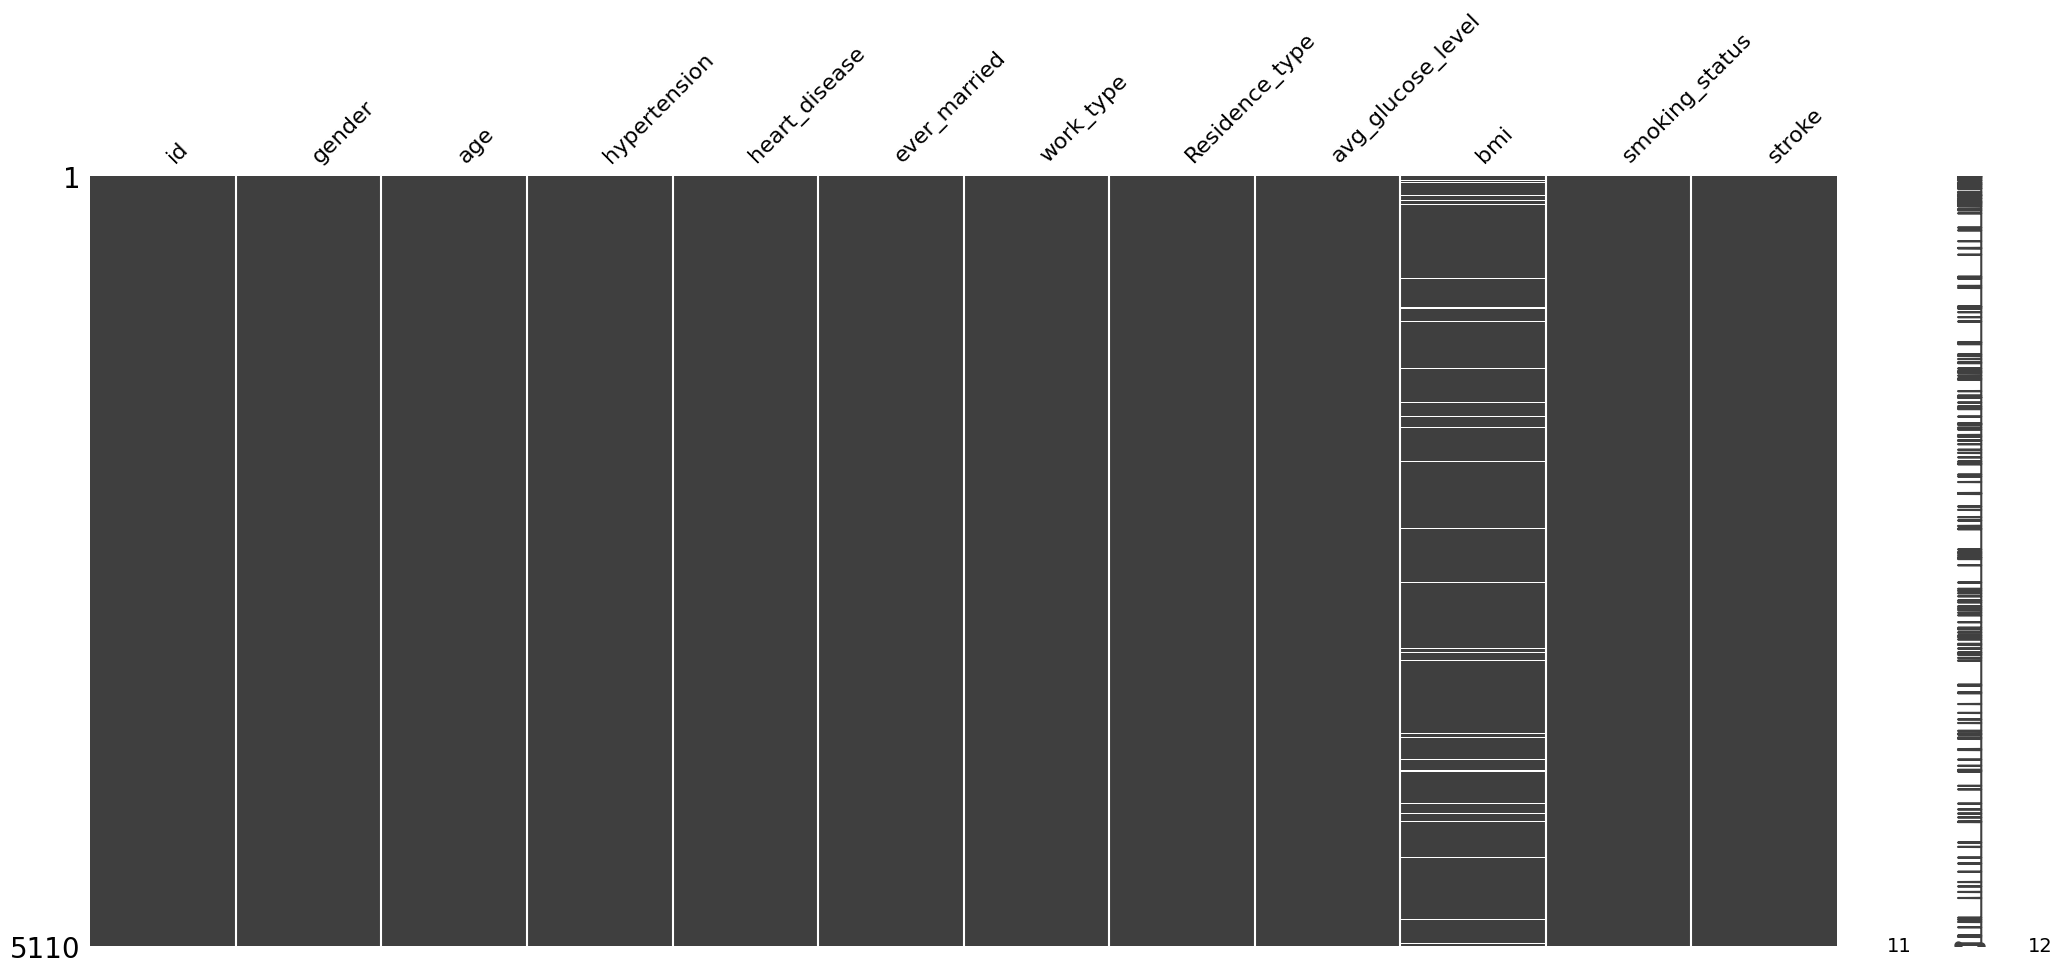

In [12]:
#Visualizing Missing Values with Missingno
import missingno as msno
msno.matrix(df_stroke)

- BMI - 2.01% missing values
  - Imputing these rows with median value of bmi

In [13]:
df_stroke['bmi'] = df_stroke['bmi'].fillna(round(df_stroke['bmi'].median(),2))

In [14]:
#Missing Values in Percent
df_stroke.isna().sum()/100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### Unique Values

In [15]:
df_stroke.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [16]:
df_stroke.nunique()/len(df_stroke) * 100


id                   100.000000
gender                 0.058708
age                    2.035225
hypertension           0.039139
heart_disease          0.039139
ever_married           0.039139
work_type              0.097847
Residence_type         0.039139
avg_glucose_level     77.866928
bmi                    8.180039
smoking_status         0.078278
stroke                 0.039139
dtype: float64

- id column has 100% unique values- this column can be dropped.

In [17]:
df_stroke.drop(columns= 'id', inplace=True)
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Data Consistency

#### Categorical Columns

In [18]:
#Save list for categorical column name.
cat_col = df_stroke.select_dtypes('object').columns
cat_col

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [19]:
#Check for nunique for categorical columns
for col in cat_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')


Value Counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




#### Numeric Columns

In [20]:
#Save list for numeric column name.
num_col = df_stroke.select_dtypes(['int', 'float']).columns
num_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [21]:
#Check for nunique for categorical columns
for col in num_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')

Value Counts for age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


Value Counts for hypertension
0    4612
1     498
Name: hypertension, dtype: int64


Value Counts for heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64


Value Counts for avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


Value Counts for bmi
28.1    230
28.7     41
28.4     38
26.7     37
27.6     37
       ... 
48.7      1
49.2      1
51.0      1
49.4      1
14.9      1
Name: bmi, Length: 418, dtype: int64


Value Counts for stroke
0    4861
1     249
Name: stroke, dtype: int64




#### Summary Statistic for Numeric Columns
  - For any numeric columns obtain the summary statistics of each(min,max,mean).

In [22]:
#Descriptive Summary for numerical columns
df_stroke.describe(include='number')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Data Analysis

##### Categorical Columns


###### EDA function for Categorical Columns

In [23]:
#Using EDA function from the LP
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None, rot1 = 45):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation= rot1, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###### 'gender'

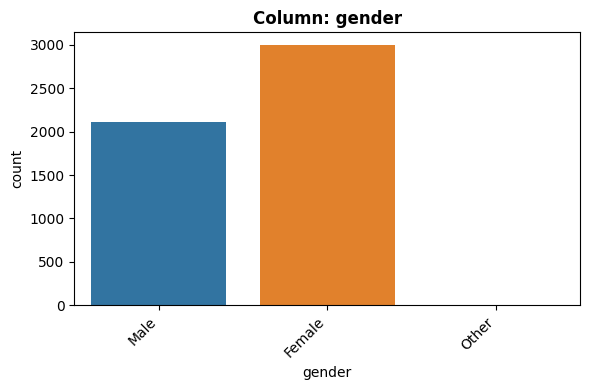

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Female' occurs 2994 times (58.59%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: gender'}, xlabel='gender', ylabel='count'>)

In [24]:
explore_categorical(df_stroke, 'gender')

###### 'ever_married'

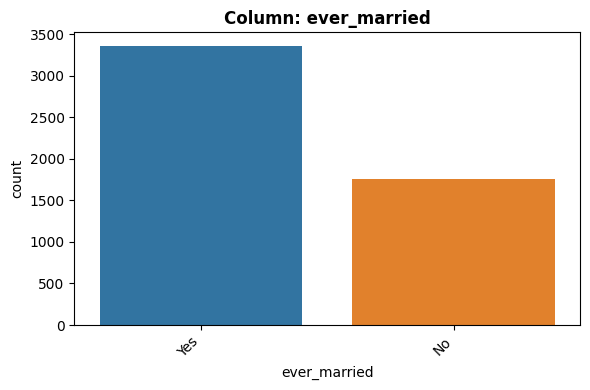

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3353 times (65.62%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: ever_married'}, xlabel='ever_married', ylabel='count'>)

In [25]:
explore_categorical(df_stroke, 'ever_married')

###### 'work_type'

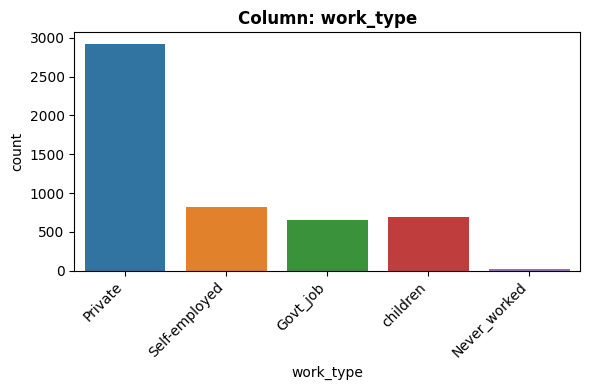

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Private' occurs 2925 times (57.24%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: work_type'}, xlabel='work_type', ylabel='count'>)

In [26]:
explore_categorical(df_stroke, 'work_type')

###### 'Residence_type'

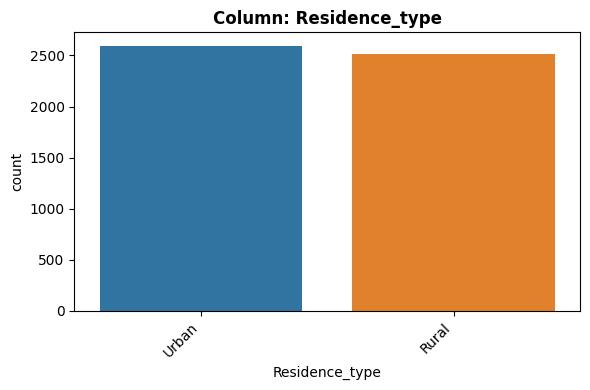

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Urban' occurs 2596 times (50.8%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Residence_type'}, xlabel='Residence_type', ylabel='count'>)

In [27]:
explore_categorical(df_stroke, 'Residence_type')

###### 'smoking_status'

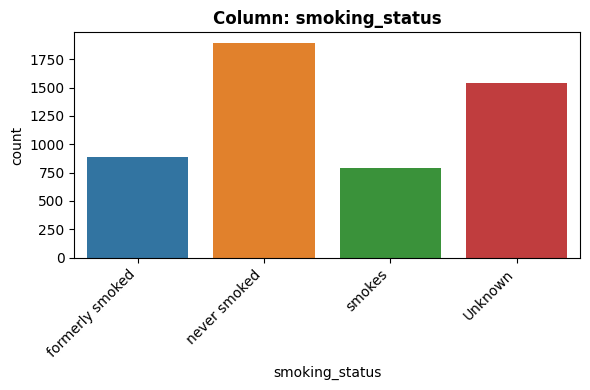

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1892 times (37.03%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: smoking_status'}, xlabel='smoking_status', ylabel='count'>)

In [28]:
explore_categorical(df_stroke, 'smoking_status')

##### Numeric Columns

###### EDA function for Numeric Columns

In [29]:
#Using EDA function from the LP
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

###### 'age'

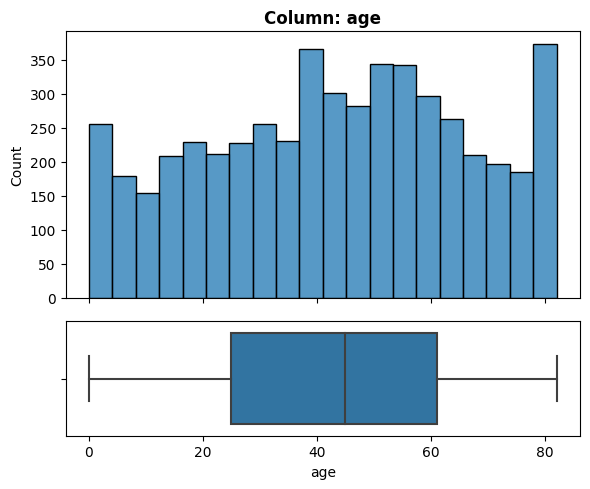

- NaN's Found: 0 (0.0%)


In [30]:
explore_numeric(df_stroke, 'age')

###### 'hypertension'

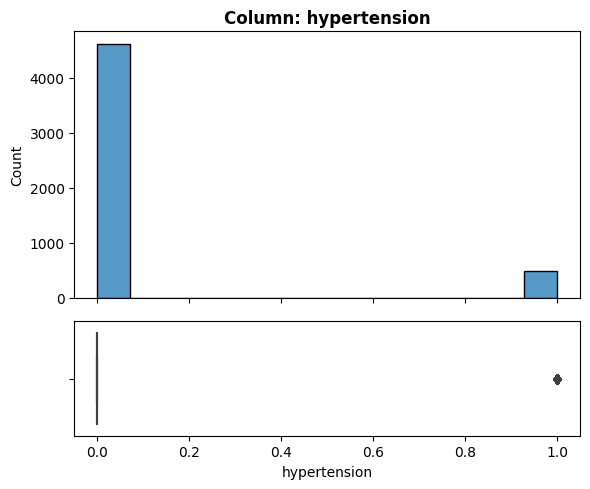

- NaN's Found: 0 (0.0%)


In [31]:
explore_numeric(df_stroke, 'hypertension')

###### 'heart_disease'

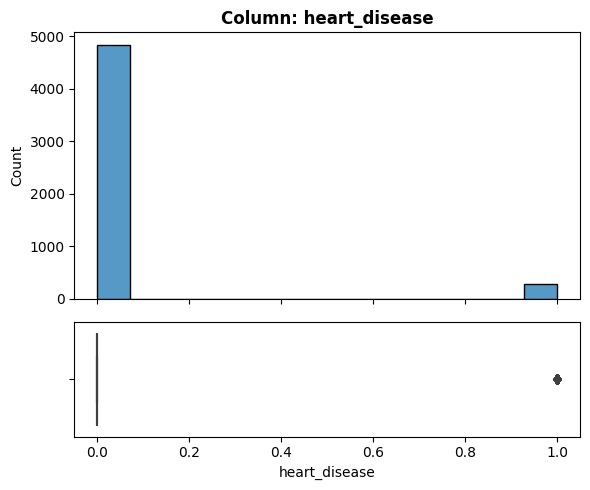

- NaN's Found: 0 (0.0%)


In [32]:
explore_numeric(df_stroke, 'heart_disease')

###### 'avg_glucose_level'

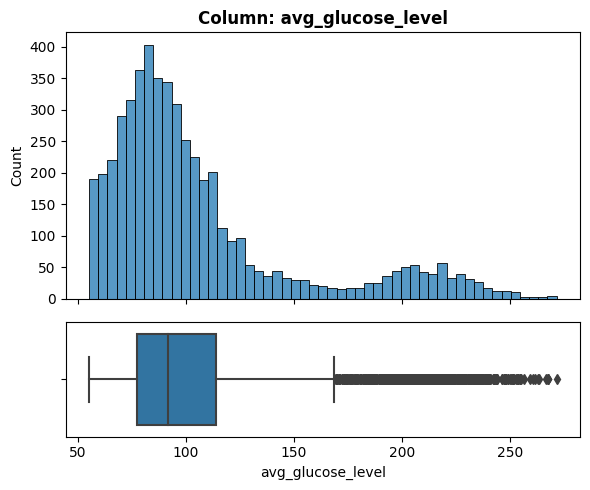

- NaN's Found: 0 (0.0%)


In [33]:
explore_numeric(df_stroke, 'avg_glucose_level')

###### 'bmi'

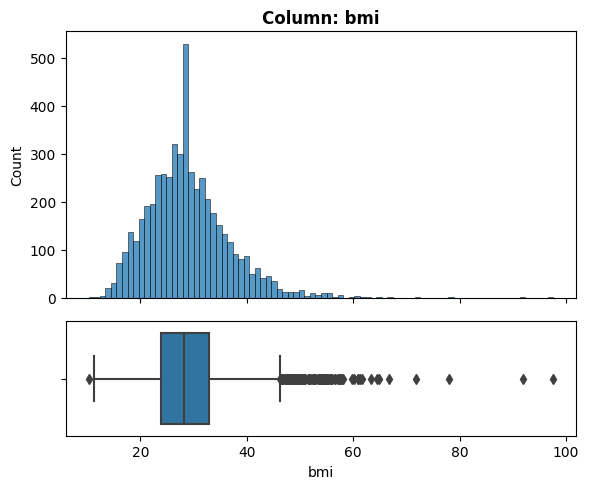

- NaN's Found: 0 (0.0%)


In [34]:
explore_numeric(df_stroke, 'bmi')

###### 'stroke'

In [35]:
df_stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

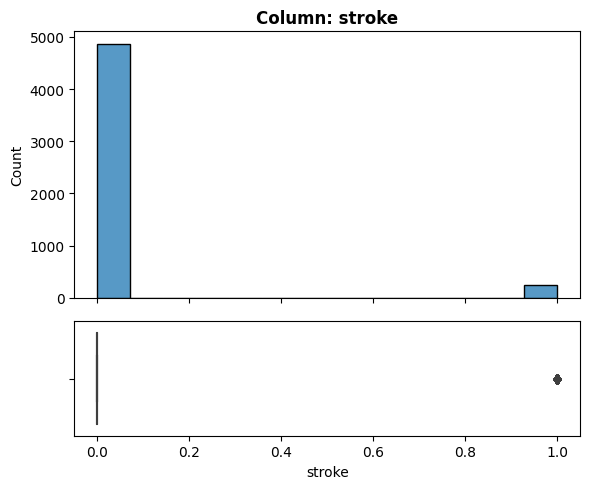

- NaN's Found: 0 (0.0%)


In [36]:
explore_numeric(df_stroke, 'stroke')

###**Correlation**

####.corr() method

In [37]:
#To check all numeric features in the dataframe for correlations, use df.corr()
corr = df_stroke.corr()

corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


####Heatmap of Correlations

- Heatmap of correlations will display any correlation between numeric features.

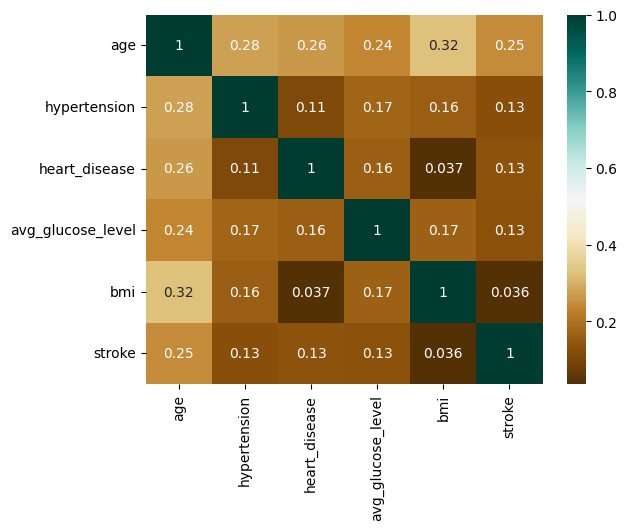

In [38]:
##Define Matplotlib fix and ax objects using plt.subplots()
## Use figsize= to set the size of the figure
fig, ax = plt.subplots()

##Define Matplotlib ax object using sns.heatmap()
##Use cmap= to define the color map
##Use annot= to annotate the correlation values
ax = sns.heatmap(corr, cmap = 'BrBG', annot = True);

Interpretation of Heatmap:
  - The highest correlation is between 'bmi' and 'age'.
  - I also notice that all features seem to have a high correlation to 'age'.

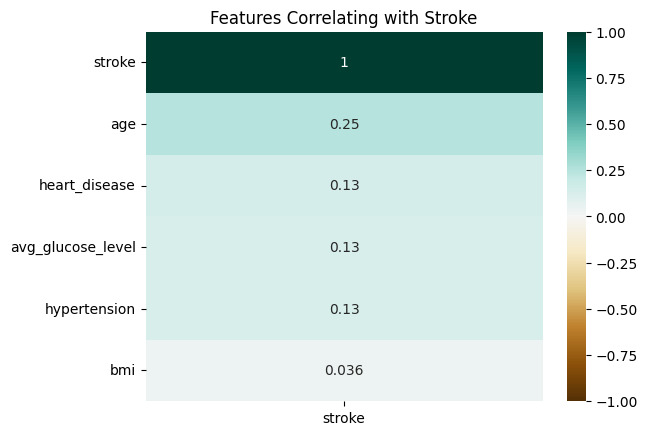

In [39]:
#Correlation of stroke with features.
#Code Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
heatmap = sns.heatmap(df_stroke.corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke');

- Age and Stroke have the highest correlation at 23%, followed by hypertension, avg_glucose_level, heart_disease all 3 features with 14 % correlation.

# **Explanatory Data Analysis**


##How does Age and BMI correlate to suffering from a stroke?


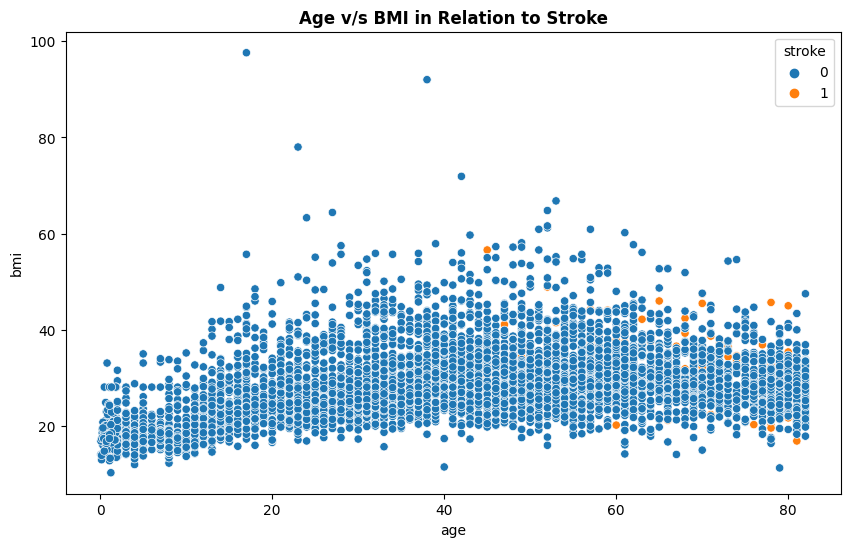

In [40]:
#Plotting Age and BMI values in relation to stroke.
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df_stroke, x="age", y="bmi", hue="stroke")
ax.set_title("Age v/s BMI in Relation to Stroke", fontweight="bold");

**Observations**
  - Majority of the people who suffer from a stroke are those who are 60 years and older.

##How does Age and Hypertension correlate to suffering from a stroke?

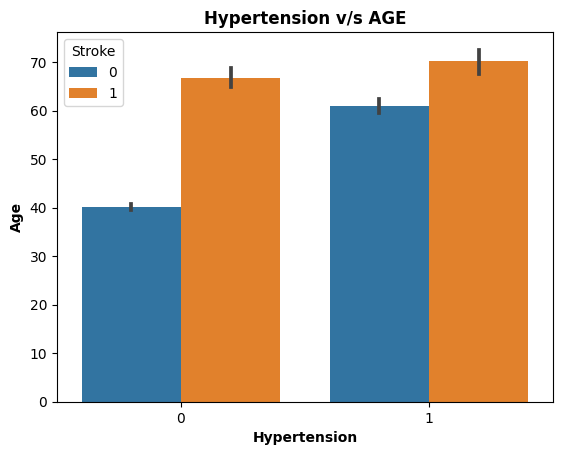

In [41]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, ax = plt.subplots()

## Define a MatplotLib ax object using sns.barplot()
ax = sns.barplot(data = df_stroke,
                 x= 'hypertension',
                 y='age', hue='stroke')

## Set the Title
ax.set_title('Hypertension v/s AGE', fontsize=12, fontweight='bold')
## Set the X axis label
ax.set_xlabel('Hypertension', fontsize=10, fontweight='bold')
## Set the Y axis label
ax.set_ylabel('Age', fontsize=10, fontweight='bold')
## Plot Legend
plt.legend(title='Stroke')
plt.show()
## Set the legend location to [1,1]
ax.legend(bbox_to_anchor=[1,1]);

**Observations**
  - We can see that those people who suffered from a stroke regardless of whether they have Hypertension or not, are at an average age of 65 years and older.

##How does Heart Disease relate to suffering from a stroke?

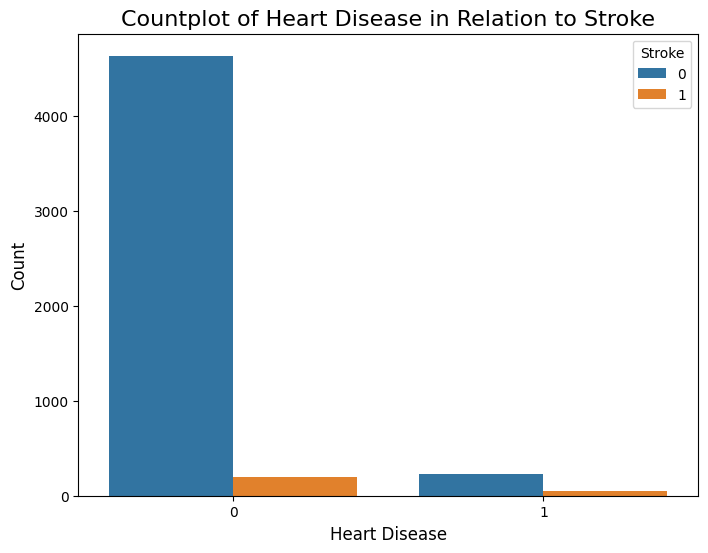

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', hue='stroke', data=df_stroke)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Heart Disease in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- As expected those with no heart disease have a higher count of not suffering from a stroke.
- However, the least count showed up for those who have heart disease and suffered from a strok.

##How does Work Type relate to suffering from a stroke?

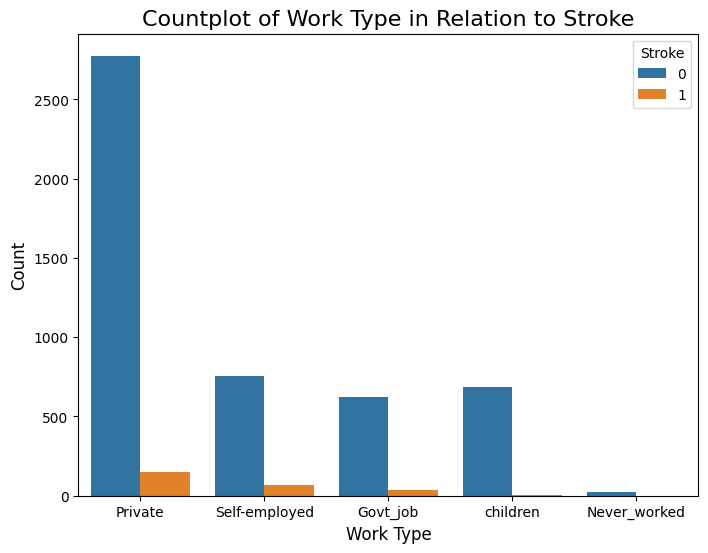

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', hue='stroke', data=df_stroke)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Work Type in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- Those working in the private sector are more like to suffer from a stroke.

##How does Smoking Status relate to suffering from a stroke?

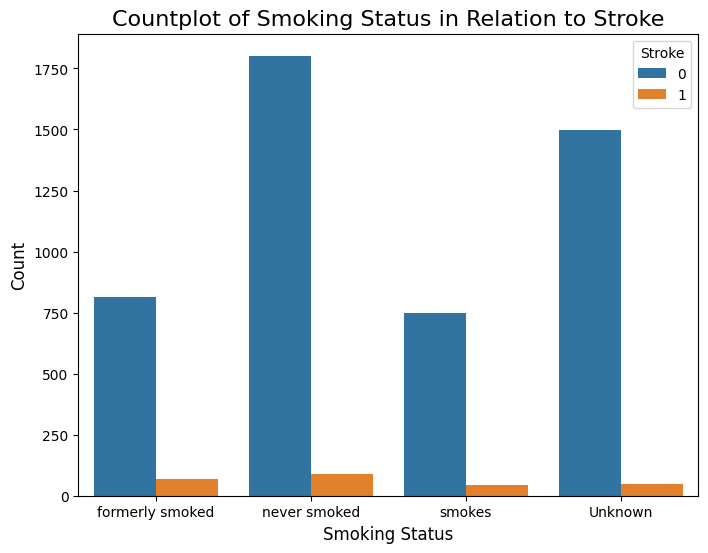

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df_stroke)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Smoking Status in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- Surprisingly, the highest count is for those who suffer from a stroke are those who are non-smokers.

#**Preprocessing for Machine Learning**

This is data is suitable for classification model.
  - I will begin by importing all the neccassary imports first.

In [45]:
#Creating a copy of dataframe for Machine Learning
df_ml = df_stroke.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [46]:
#IMPORTS for Machine Learning
## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

#CLASSIFICATION METRIX
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_sampler_pipeline


In [47]:
#I am using the custom function used in the code along- ROC AUC to evaluate the classification metrics.

## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

##**Data Consistency**

### **Data Consistency- Categorical Columns**




In [48]:
# save list of categorical column name.
categorical_col = df_ml.select_dtypes('object').columns
categorical_col

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [49]:
# Check for nunique for categorical columns
for col in categorical_col:
  print(f'Value Counts for {col}')
  print(df_ml[col].value_counts())
  print('\n')

Value Counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [50]:
df_ml[df_ml['gender'] == 'Other'].index[0]

3116

In [51]:
df_ml.drop(3116, inplace=True)

In [52]:
df_ml['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

###**Data Consistency- Numerical Columns**

In [53]:
# Have list of numerical column name.
numerical_col = df_ml.select_dtypes(['int', 'float']).columns
numerical_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [54]:
# check for nunique for numerical columns
for col in numerical_col:
  print(f'Value Counts for {col}')
  print(df_ml[col].value_counts())
  print('\n')

Value Counts for age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


Value Counts for hypertension
0    4611
1     498
Name: hypertension, dtype: int64


Value Counts for heart_disease
0    4833
1     276
Name: heart_disease, dtype: int64


Value Counts for avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
94.07     1
111.93    1
94.40     1
95.57     1
85.28     1
Name: avg_glucose_level, Length: 3978, dtype: int64


Value Counts for bmi
28.1    230
28.7     41
28.4     38
26.7     37
27.6     37
       ... 
48.7      1
49.2      1
51.0      1
49.4      1
14.9      1
Name: bmi, Length: 418, dtype: int64


Value Counts for stroke
0    4860
1     249
Name: stroke, dtype: int64




In [55]:
df_ml.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [56]:
#Check and Drop null values in target column stroke
df_ml['stroke'].isna().sum()

0

- There are 0 null values in target column.

##**Defining X and y**

### Define X and y

In [57]:
## Define X and y
target = 'stroke'

X = df_ml.drop(columns=target)
y = df_ml[target]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


####Train-Test-Split

In [58]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [59]:
X_train.shape

(3831, 10)

###Check Class Balance

In [60]:
y_train.value_counts()

0    3644
1     187
Name: stroke, dtype: int64

In [61]:
y_test.value_counts()

0    1216
1      62
Name: stroke, dtype: int64

###Numeric Transformation

In [62]:
#Using median stratergy to impute missing values for numeric columns

#Column Selector
num_col = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_col)

#Transformers
scaler = StandardScaler()

#Pipeline
num_pipe = make_pipeline(scaler)

#Tuple
num_tuple = ('numeric', num_pipe, num_col)

Numeric Columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


In [63]:
num_pipe.fit(X_train[num_col])
X_train_num_tf = num_pipe.transform(X_train[num_col])
X_test_num_tf = num_pipe.transform(X_test[num_col])

###Nominal Transformation

In [64]:
#Nominal Category
nom_col = X_train.select_dtypes('object').columns

#Transformers
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Pipeline
ohe_pipe = make_pipeline(ohe)

#Tuple
ohe_tuple = ('categorical', ohe_pipe, nom_col)

In [65]:
ohe_pipe.fit(X_train[nom_col])
X_train_ohe_tf = ohe_pipe.transform(X_train[nom_col])
X_test_ohe_tf = ohe_pipe.transform(X_test[nom_col])


In [66]:
#Re-combining training data
X_train_tf = pd.concat([X_train_num_tf, X_train_ohe_tf], axis=1)
X_test_tf = pd.concat([X_test_num_tf, X_test_ohe_tf], axis=1)

###Column Transformer

In [67]:
#Instantiate Column Transformer
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [68]:
col_transformer.fit_transform(X_train)
col_transformer.transform(X_test)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3922,0.870428,-0.320072,-0.24444,-0.479322,1.219710,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2988,0.031551,-0.320072,-0.24444,-1.020409,-0.496253,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4365,0.737974,-0.320072,-0.24444,-0.216546,-0.015263,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1360,0.737974,-0.320072,-0.24444,-0.965016,0.985715,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4025,-1.690355,-0.320072,-0.24444,-0.024475,-1.627228,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,-0.498267,-0.320072,-0.24444,-0.307516,-0.158260,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2101,-0.983932,-0.320072,-0.24444,-0.558357,0.244731,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
786,0.914579,3.124298,-0.24444,-0.262256,1.167711,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
76,1.621003,3.124298,-0.24444,3.027499,-0.236258,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


##Model Evaluation

###Logistic Regression

In [69]:
lr = LogisticRegression(random_state=42)
lr_pipe = make_pipeline(col_transformer, lr)
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [70]:
#Save the model's predictions for the train dataset
lr_train_preds = lr_pipe.predict(X_train)

#Save the model's predictions for the test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [71]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, lr_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3644
      Stroke       0.00      0.00      0.00       187

    accuracy                           0.95      3831
   macro avg       0.48      0.50      0.49      3831
weighted avg       0.90      0.95      0.93      3831

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      1216
      Stroke       1.00      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.98      0.51      0.50      1278
weighted avg       0.95      0.95      0.93      1278



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3644
           1       0.22      0.21      0.21       187

    accuracy                           0.92      3831
   macro avg       0.59      0.58      0.59      3831
weighted avg       0.92      0.92      0.92      3831



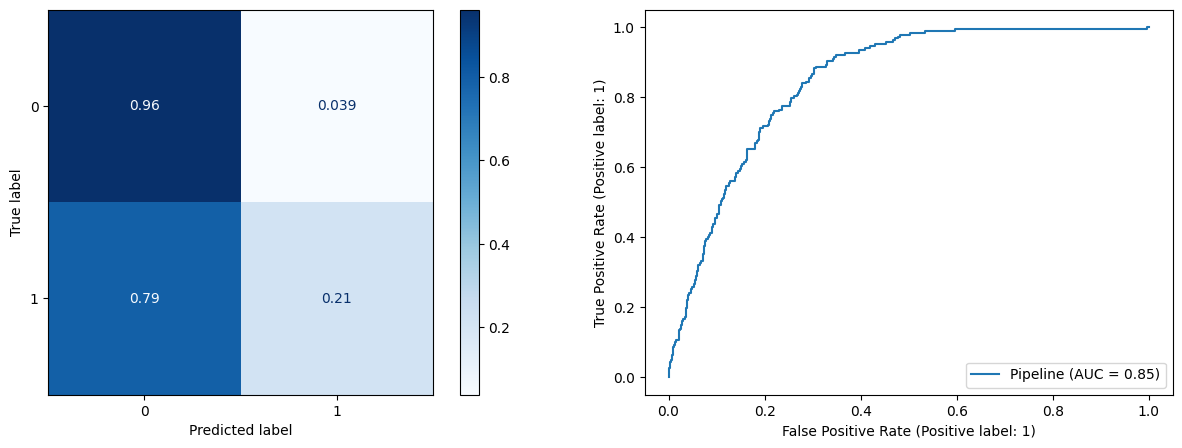

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1216
           1       0.30      0.34      0.32        62

    accuracy                           0.93      1278
   macro avg       0.63      0.65      0.64      1278
weighted avg       0.93      0.93      0.93      1278



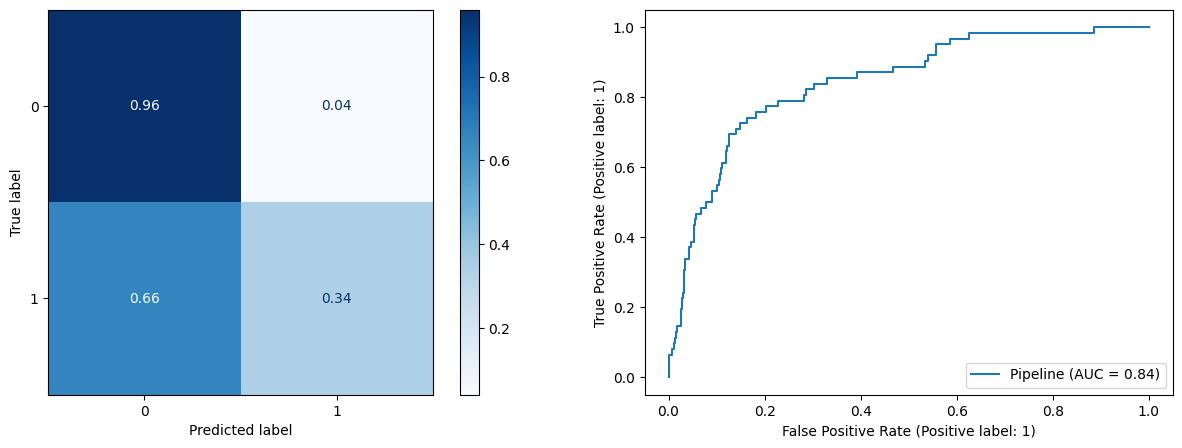

In [72]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(lr_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(lr_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

####Tune Hyperparameters

In [73]:
#Display the hyperparameters
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'columntransformer': Colum

In [74]:
#Dictionary for the parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]}

In [75]:
#Tune hyperparameters using GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 50,
                                                   100, 1000]})

In [76]:
lr_gs.best_params_

{'logisticregression__C': 0.001}

- Best Parameter: 0.001

In [77]:
best_lr = lr_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3644
           1       0.00      0.00      0.00       187

    accuracy                           0.95      3831
   macro avg       0.48      0.50      0.49      3831
weighted avg       0.90      0.95      0.93      3831



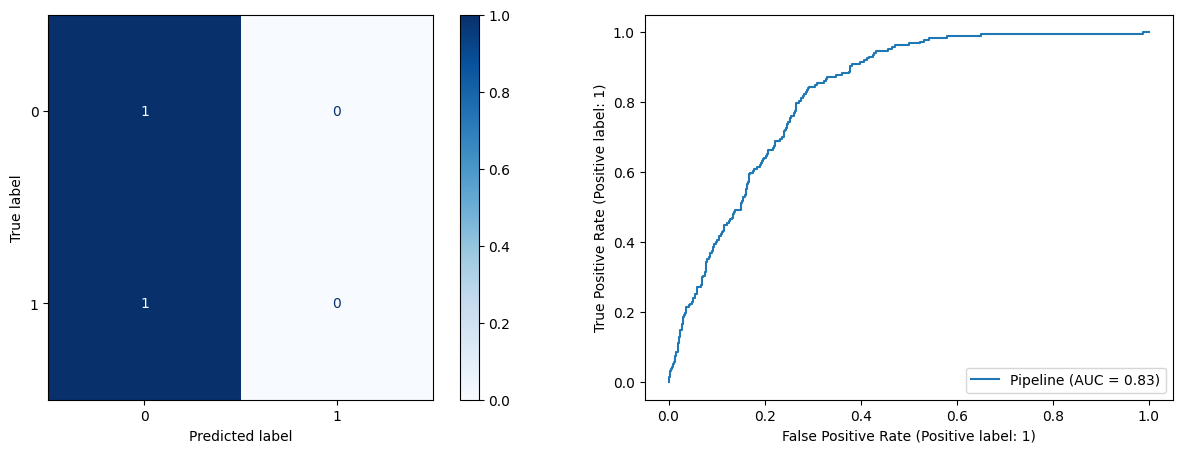

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



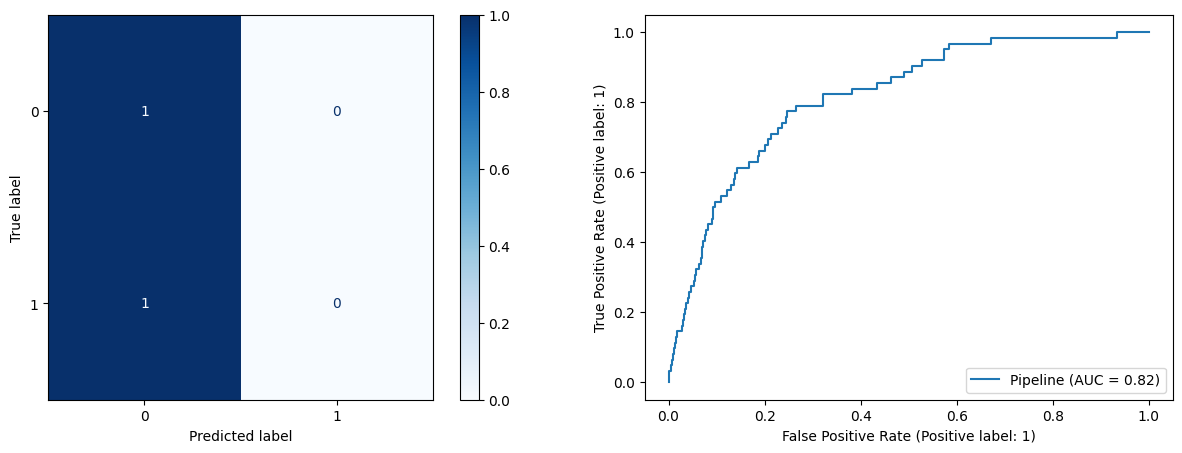

In [78]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_lr, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_lr, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')


###Decision Tree Classifier

In [79]:
dt = DecisionTreeClassifier(random_state=42)
dt_pipe = make_pipeline(col_transformer, dt)
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [80]:
#Save the model's predictions for the train dataset
dt_train_preds = dt_pipe.predict(X_train)

#Save the model's predictions for the test dataset
dt_test_preds = dt_pipe.predict(X_test)

In [81]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, dt_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, dt_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3644
      Stroke       1.00      1.00      1.00       187

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831

Test Report
              precision    recall  f1-score   support

   No Stroke       0.96      0.95      0.96      1216
      Stroke       0.18      0.21      0.19        62

    accuracy                           0.92      1278
   macro avg       0.57      0.58      0.57      1278
weighted avg       0.92      0.92      0.92      1278



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3644
           1       1.00      1.00      1.00       187

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831



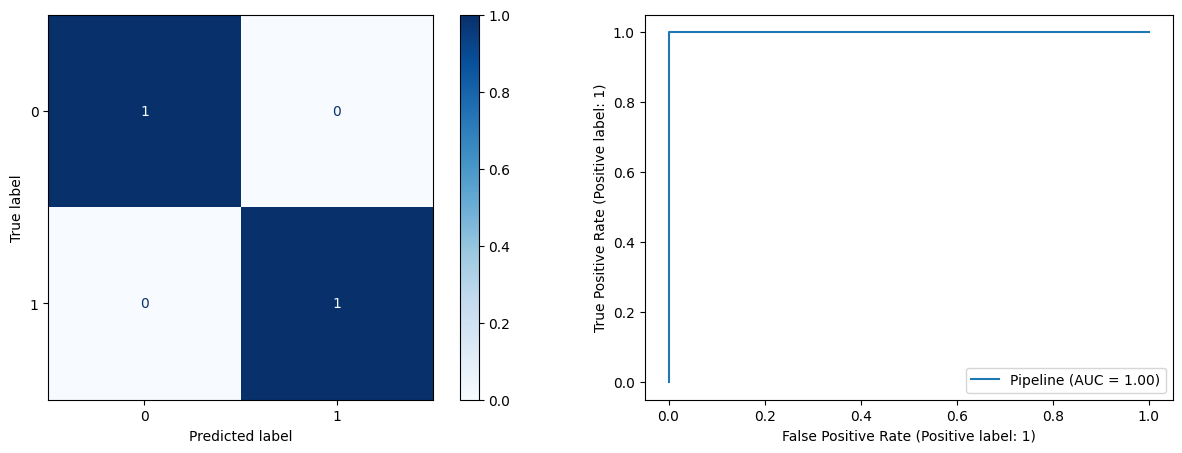

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1216
           1       0.18      0.21      0.19        62

    accuracy                           0.92      1278
   macro avg       0.57      0.58      0.57      1278
weighted avg       0.92      0.92      0.92      1278



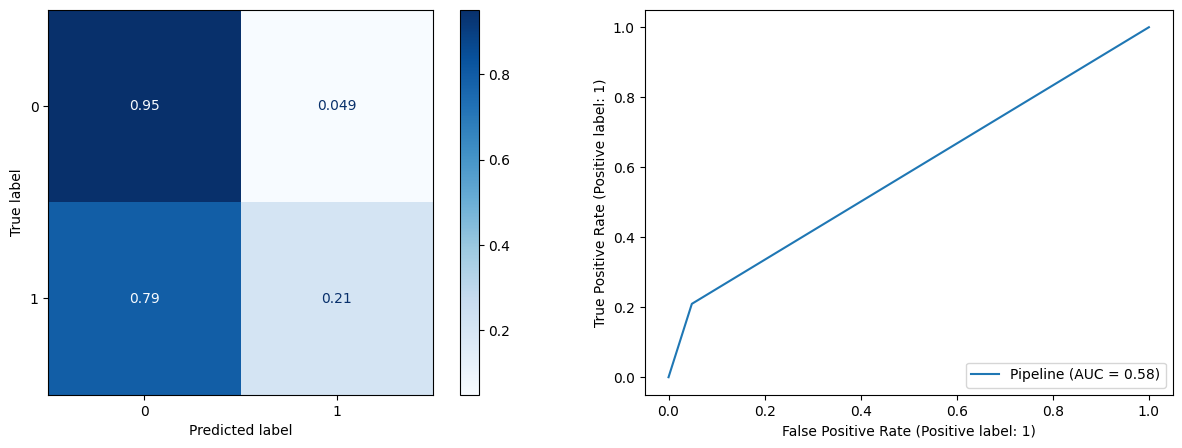

In [82]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(dt_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(dt_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

####Tune Hyperparameters

In [83]:
#Display the hyperparameters
dt_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42))],
 'verbose': False,
 'columntransformer

In [84]:
#Dictionary for the parameters
params = {'decisiontreeclassifier__random_state': [42], 'decisiontreeclassifier__min_samples_leaf': [5, 20, 80, 320]}

In [85]:
#Tune hyperparameters using GridSearchCV
dt_gs = GridSearchCV(dt_pipe, params)
dt_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'decisiontreeclassifier__min_samples_leaf': [5, 20, 80,
                                                                      320],
                         'decisiontreeclassifier__random_state': [42]})

In [86]:
dt_gs.best_params_

{'decisiontreeclassifier__min_samples_leaf': 20,
 'decisiontreeclassifier__random_state': 42}

- Best Parameter: min_samples_leaf: 20

In [87]:
best_dt = dt_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3644
           1       0.33      0.58      0.42       187

    accuracy                           0.92      3831
   macro avg       0.65      0.76      0.69      3831
weighted avg       0.95      0.92      0.93      3831



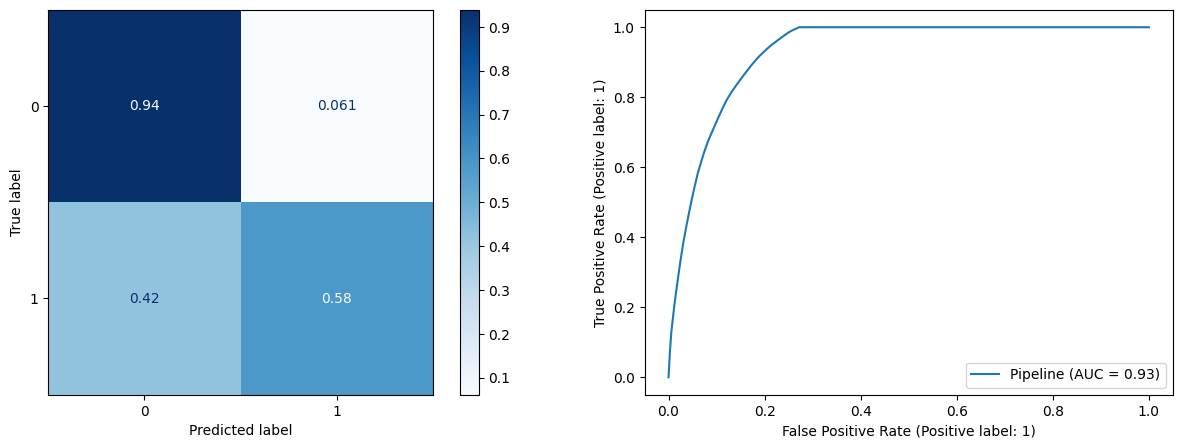

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1216
           1       0.17      0.32      0.22        62

    accuracy                           0.89      1278
   macro avg       0.57      0.62      0.58      1278
weighted avg       0.93      0.89      0.91      1278



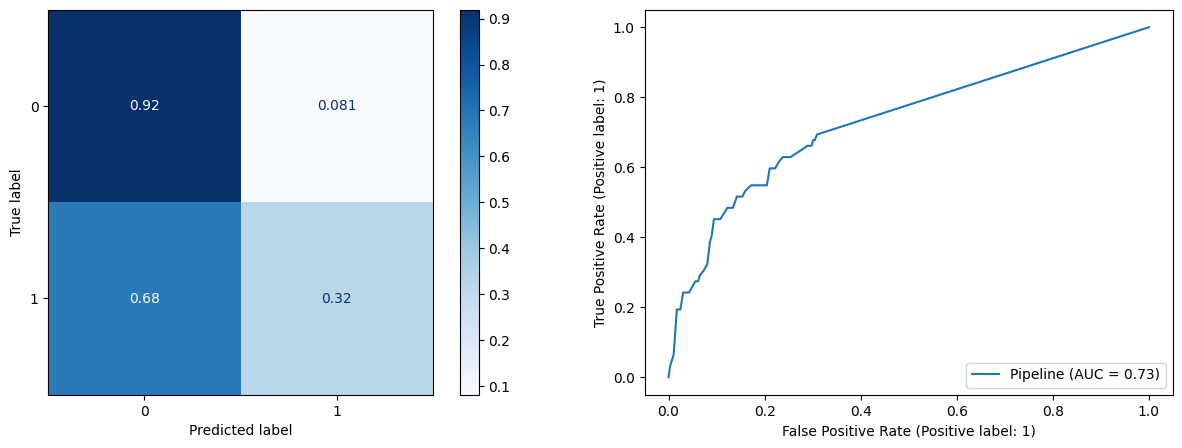

In [88]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_dt, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_dt, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')


###KNN

In [89]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(col_transformer, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [90]:
#Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)

#Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [91]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      3644
      Stroke       0.56      0.05      0.10       187

    accuracy                           0.95      3831
   macro avg       0.75      0.53      0.54      3831
weighted avg       0.93      0.95      0.93      3831

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1216
      Stroke       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3644
           1       0.42      0.32      0.36       187

    accuracy                           0.95      3831
   macro avg       0.69      0.65      0.67      3831
weighted avg       0.94      0.95      0.94      3831



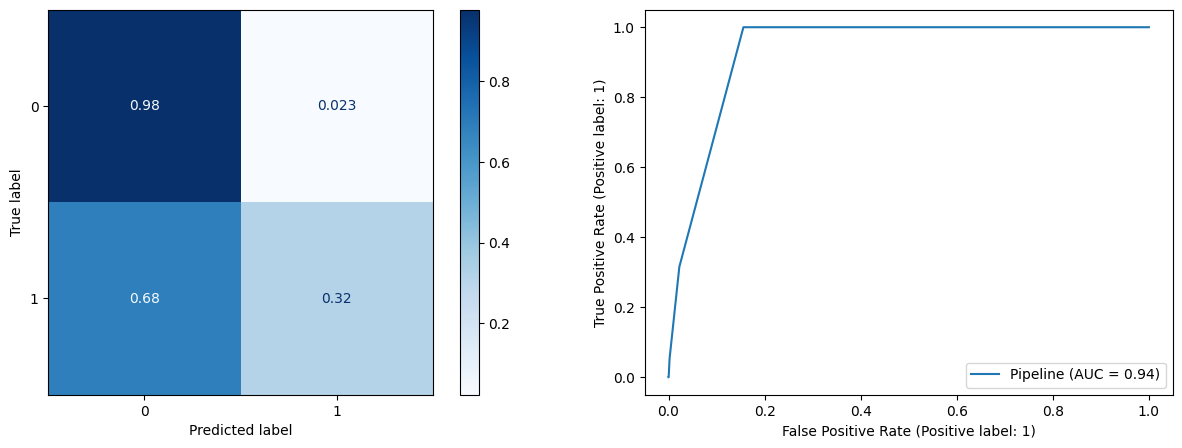

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1216
           1       0.12      0.10      0.11        62

    accuracy                           0.92      1278
   macro avg       0.54      0.53      0.53      1278
weighted avg       0.91      0.92      0.92      1278



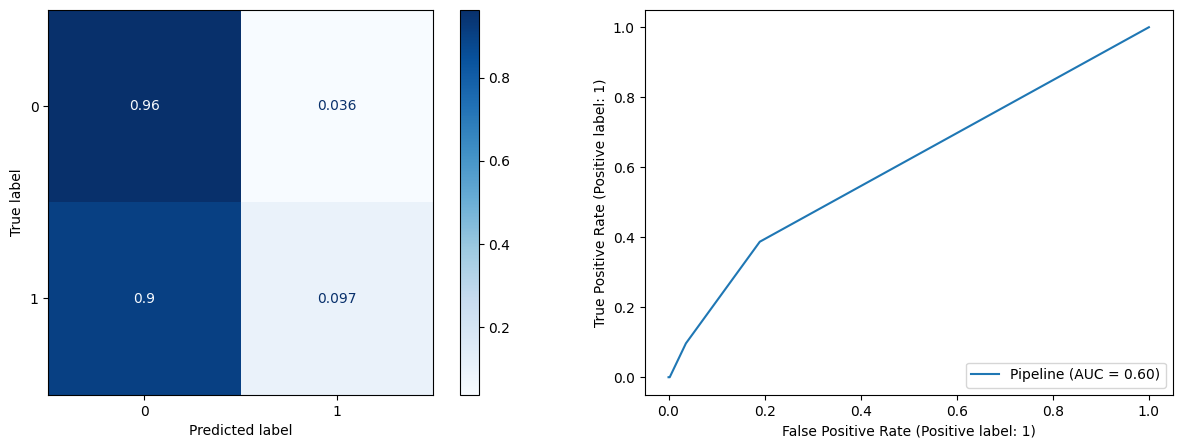

In [92]:
#Use the function twice to evaluate our model on training and test data
labels = ['No Stroke', 'Stroke']
classification_metrics(knn_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(knn_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

#### Tune Hyperparameters

In [93]:
#Display the hyperparameters
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransforme

In [94]:
#Create a dictionary of parameters
params = {'kneighborsclassifier__n_neighbors': range(1,15),
         'kneighborsclassifier__weights': ['distance', 'uniform']}

In [95]:
#True hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [96]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 14,
 'kneighborsclassifier__weights': 'uniform'}

- Best Parameter -n_neighbours: 14 ; weights -'uniform'

In [97]:
knn_gs.best_score_

0.9511878704116613

In [98]:
best_knn = knn_gs.best_estimator_

In [99]:
#Check the best parameter
#Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3644
           1       0.27      0.39      0.32       187

    accuracy                           0.92      3831
   macro avg       0.62      0.67      0.64      3831
weighted avg       0.93      0.92      0.93      3831



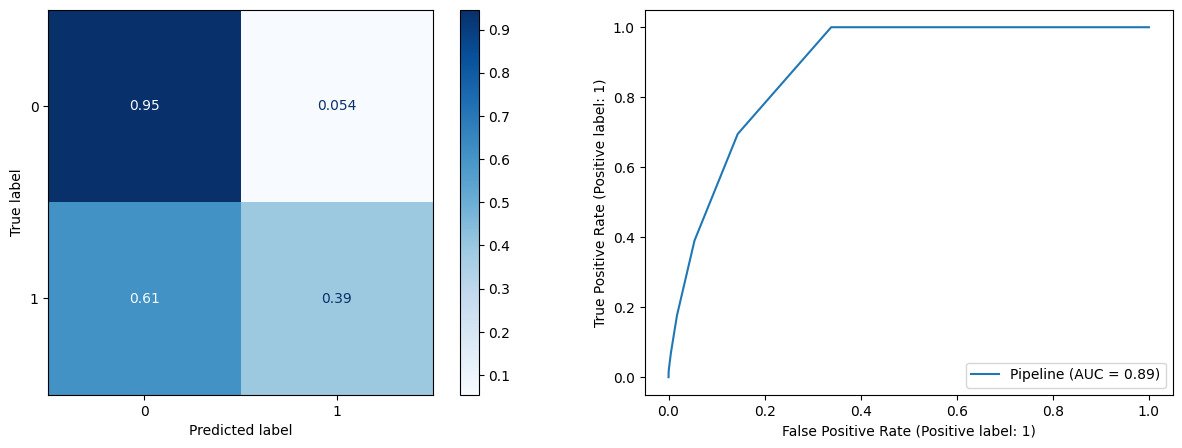

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1216
           1       0.21      0.27      0.24        62

    accuracy                           0.91      1278
   macro avg       0.58      0.61      0.60      1278
weighted avg       0.93      0.91      0.92      1278



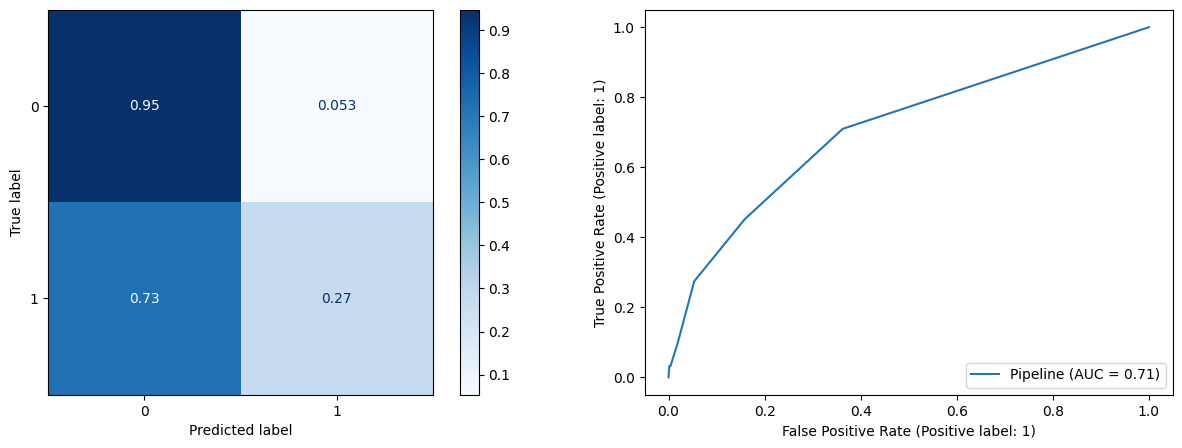

In [100]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_knn, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_knn, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

###Random Forest Classifier

In [101]:
rf = RandomForestClassifier(random_state=42)
rf_pipe = make_pipeline(col_transformer, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [102]:
#Save the model's predictions for the train dataset
rf_train_preds = rf_pipe.predict(X_train)

#Save the model's predictions for the test dataset
rf_test_preds = rf_pipe.predict(X_test)

In [103]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, rf_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, rf_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3644
      Stroke       1.00      1.00      1.00       187

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1216
      Stroke       0.33      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.64      0.51      0.50      1278
weighted avg       0.92      0.95      0.93      1278



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3644
           1       0.96      1.00      0.98       187

    accuracy                           1.00      3831
   macro avg       0.98      1.00      0.99      3831
weighted avg       1.00      1.00      1.00      3831



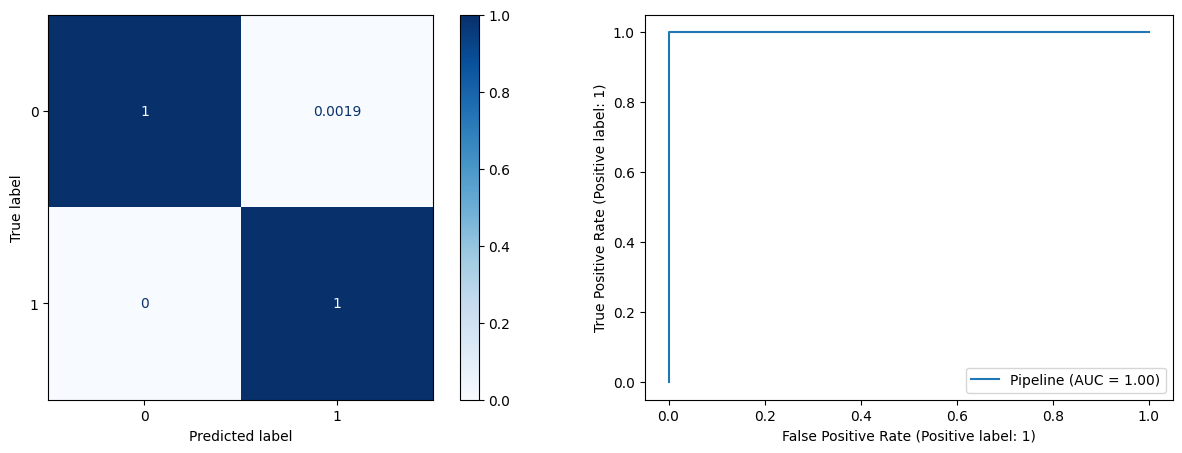

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1216
           1       0.13      0.16      0.14        62

    accuracy                           0.91      1278
   macro avg       0.54      0.55      0.55      1278
weighted avg       0.92      0.91      0.91      1278



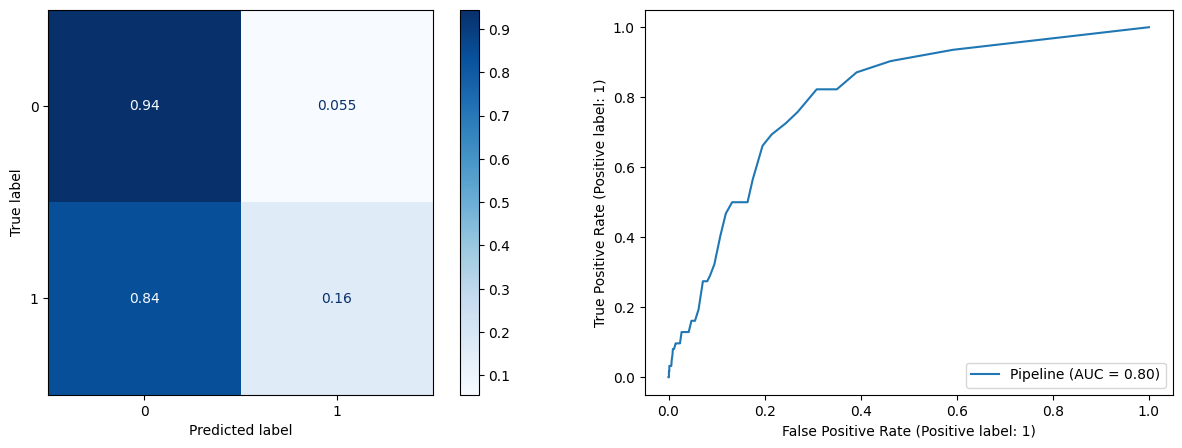

In [104]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(rf_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(rf_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

####Tune Hyperparameters

In [105]:
#Display the hyperparameters
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'columntransformer

In [106]:
#Dictionary for the parameters
params = {'randomforestclassifier__n_estimators':[10, 50, 100]}

In [107]:
#Tune hyperparameters using GridSearchCV
rf_gs = GridSearchCV(rf_pipe, params)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__n_estimators': [10, 50, 100]})

In [108]:
rf_gs.best_params_

{'randomforestclassifier__n_estimators': 100}

- Best Parameter: 100

In [109]:
best_rf = rf_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3644
           1       0.96      1.00      0.98       187

    accuracy                           1.00      3831
   macro avg       0.98      1.00      0.99      3831
weighted avg       1.00      1.00      1.00      3831



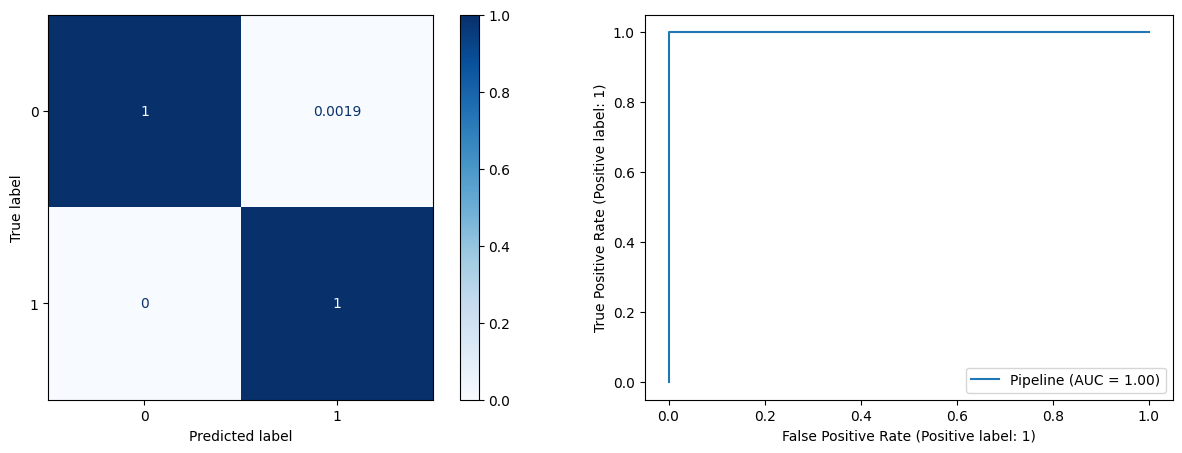

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1216
           1       0.13      0.16      0.14        62

    accuracy                           0.91      1278
   macro avg       0.54      0.55      0.55      1278
weighted avg       0.92      0.91      0.91      1278



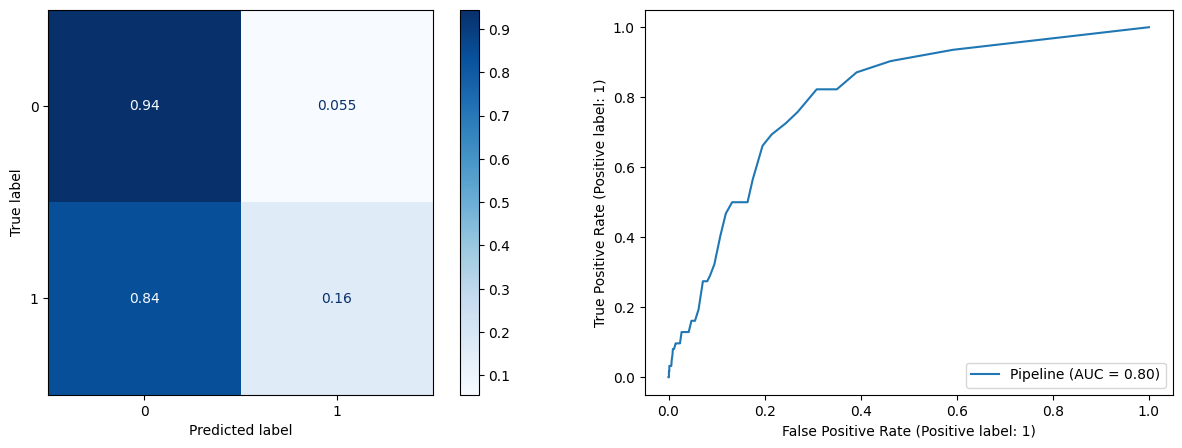

In [110]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_rf, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_rf, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')


### Gradient Boosting Classifier

In [111]:
gb = GradientBoostingClassifier(random_state=42)
gb_pipe = make_pipeline(col_transformer, gb)
gb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [112]:
#Save the model's predictions for the train dataset
gb_train_preds = gb_pipe.predict(X_train)

#Save the model's predictions for the test dataset
gb_test_preds = gb_pipe.predict(X_test)

In [113]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, gb_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, gb_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98      3644
      Stroke       1.00      0.18      0.31       187

    accuracy                           0.96      3831
   macro avg       0.98      0.59      0.64      3831
weighted avg       0.96      0.96      0.95      3831

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1216
      Stroke       0.17      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.56      0.51      0.50      1278
weighted avg       0.91      0.95      0.93      1278



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3644
           1       0.56      0.59      0.58       187

    accuracy                           0.96      3831
   macro avg       0.77      0.78      0.78      3831
weighted avg       0.96      0.96      0.96      3831



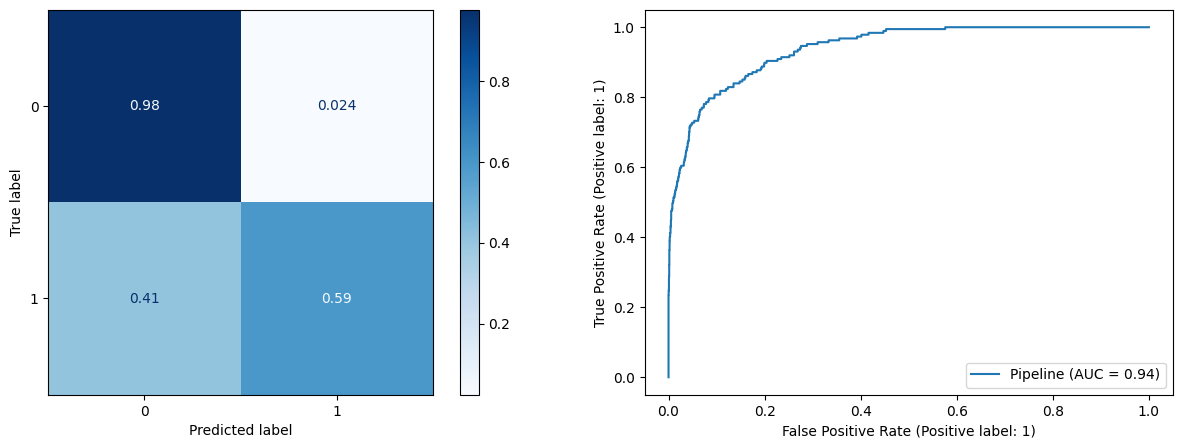

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1216
           1       0.20      0.23      0.21        62

    accuracy                           0.92      1278
   macro avg       0.58      0.59      0.58      1278
weighted avg       0.92      0.92      0.92      1278



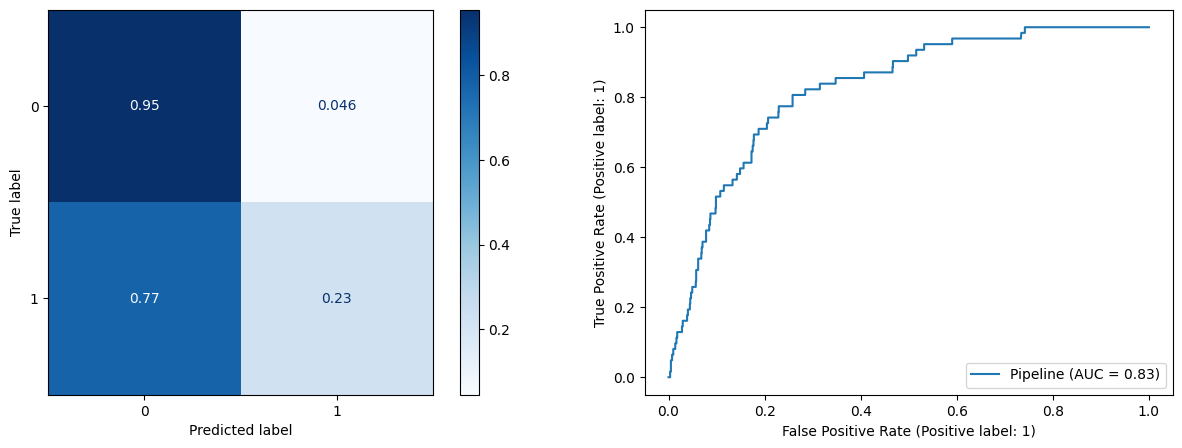

In [114]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(gb_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(gb_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

#### Tune Hyperparameters

In [115]:
#Display the hyperparameters
gb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('gradientboostingclassifier', GradientBoostingClassifier(random_state=42))],
 'verbose': False,
 'columntra

In [116]:
#Dictionary for the parameters
params = {'gradientboostingclassifier__learning_rate': [0.1, 0.001, 0.01]}

In [117]:
#Tune hyperparameters using GridSearchCV
gb_gs = GridSearchCV(gb_pipe, params)
gb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'gradientboostingclassifier__learning_rate': [0.1,
                                                                       0.001,
                                                                       0.01]})

In [118]:
gb_gs.best_params_

{'gradientboostingclassifier__learning_rate': 0.001}

- Best Parameter: Learning Rate at 0.001

In [119]:
best_gb = gb_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3644
           1       0.00      0.00      0.00       187

    accuracy                           0.95      3831
   macro avg       0.48      0.50      0.49      3831
weighted avg       0.90      0.95      0.93      3831



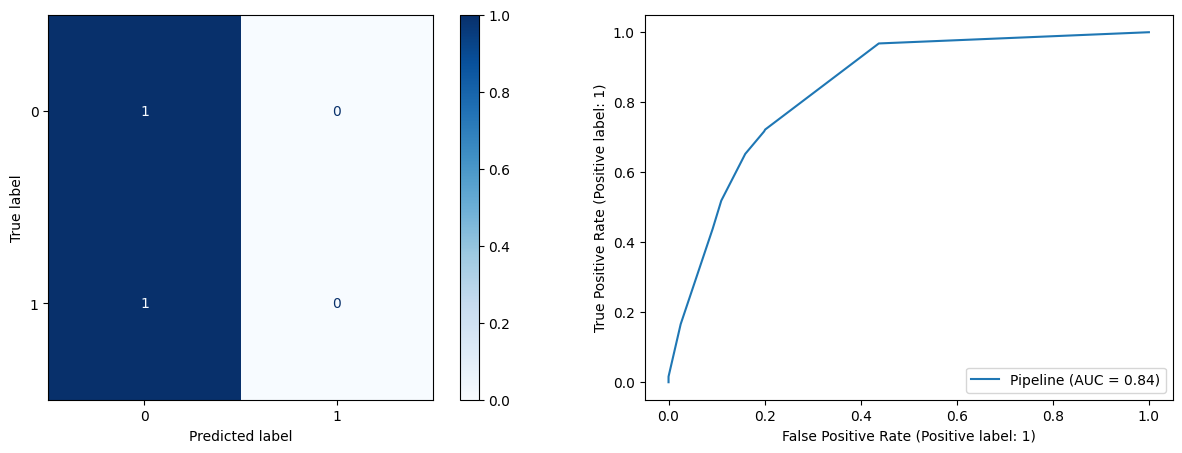

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



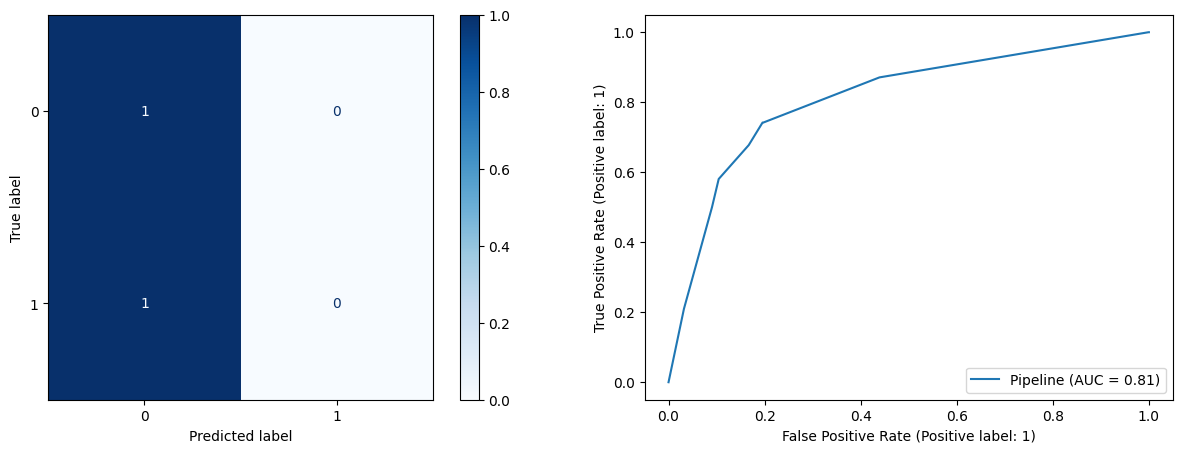

In [120]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_gb, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_gb, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')


### ADABoost Classifier

In [121]:
ab = AdaBoostClassifier(random_state=42)
ab_pipe = make_pipeline(col_transformer, ab)
ab_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

In [122]:
#Save the model's predictions for the train dataset
ab_train_preds = ab_pipe.predict(X_train)

#Save the model's predictions for the test dataset
ab_test_preds = ab_pipe.predict(X_test)

In [123]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, ab_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, ab_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      3644
      Stroke       0.50      0.03      0.05       187

    accuracy                           0.95      3831
   macro avg       0.73      0.51      0.51      3831
weighted avg       0.93      0.95      0.93      3831

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1216
      Stroke       0.33      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.64      0.51      0.50      1278
weighted avg       0.92      0.95      0.93      1278



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3644
           1       0.05      1.00      0.09       187

    accuracy                           0.05      3831
   macro avg       0.02      0.50      0.05      3831
weighted avg       0.00      0.05      0.00      3831



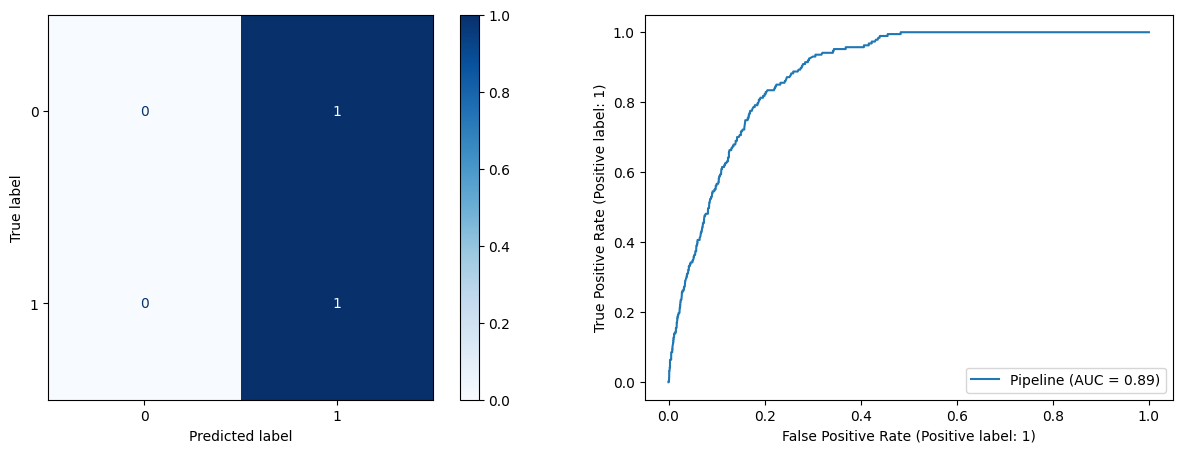

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1216
           1       0.05      1.00      0.09        62

    accuracy                           0.05      1278
   macro avg       0.02      0.50      0.05      1278
weighted avg       0.00      0.05      0.00      1278



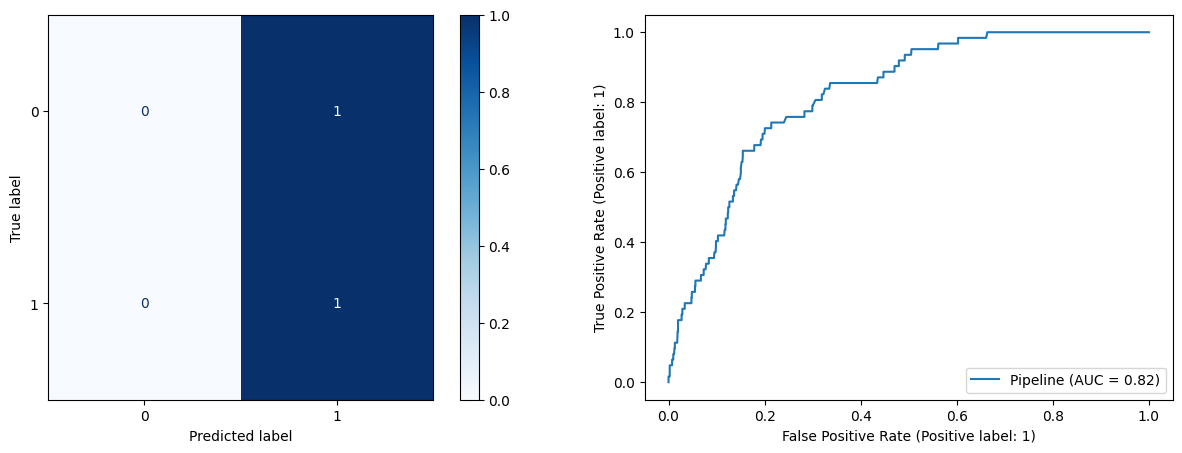

In [124]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(ab_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(ab_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

#### Tune Hyperparameters

In [125]:
#Display the hyperparameters
ab_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('adaboostclassifier', AdaBoostClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': Colum

In [126]:
#Dictionary for the parameters
params = {'adaboostclassifier__n_estimators': [35, 40, 140, 145, 20],'adaboostclassifier__random_state': [42], 'adaboostclassifier__learning_rate': [0.1, 0.01, 0.001, 1.0] }

In [127]:
#Tune hyperparameters using GridSearchCV
ab_gs = GridSearchCV(ab_pipe, params)
ab_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False...
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'adaboostclassifier__learning_rate': [0.1, 0.01, 0.001,
                                                               1.0],
                         'adaboostclassifier__n_estimators': [35, 40, 140, 145,
                                                              20],
                         'adaboostclassifier__random_state': [42]})

In [128]:
ab_gs.best_params_

{'adaboostclassifier__learning_rate': 0.1,
 'adaboostclassifier__n_estimators': 35,
 'adaboostclassifier__random_state': 42}

- Best Parameter: Learning Rate at 0.1, n_estimators 35

In [129]:
best_ab = ab_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.41      0.59      3644
           1       0.08      0.99      0.15       187

    accuracy                           0.44      3831
   macro avg       0.54      0.70      0.37      3831
weighted avg       0.95      0.44      0.56      3831



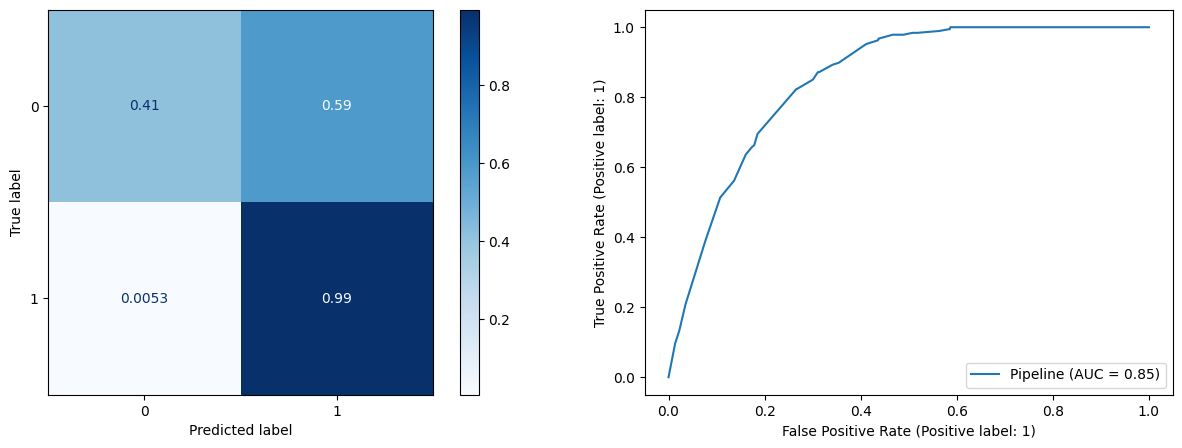

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59      1216
           1       0.08      0.97      0.15        62

    accuracy                           0.45      1278
   macro avg       0.54      0.69      0.37      1278
weighted avg       0.95      0.45      0.57      1278



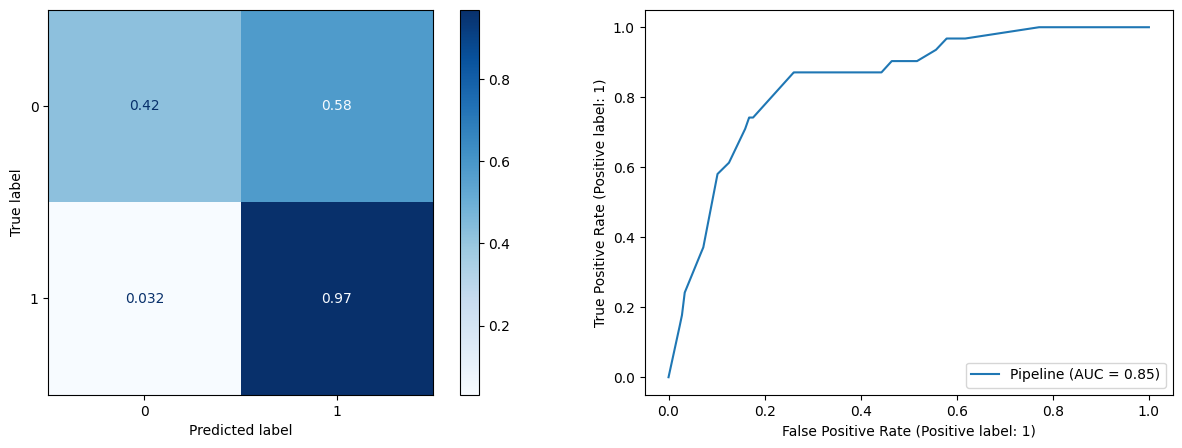

In [130]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_ab, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_ab, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.41      0.59      3644
           1       0.08      0.99      0.15       187

    accuracy                           0.44      3831
   macro avg       0.54      0.70      0.37      3831
weighted avg       0.95      0.44      0.56      3831



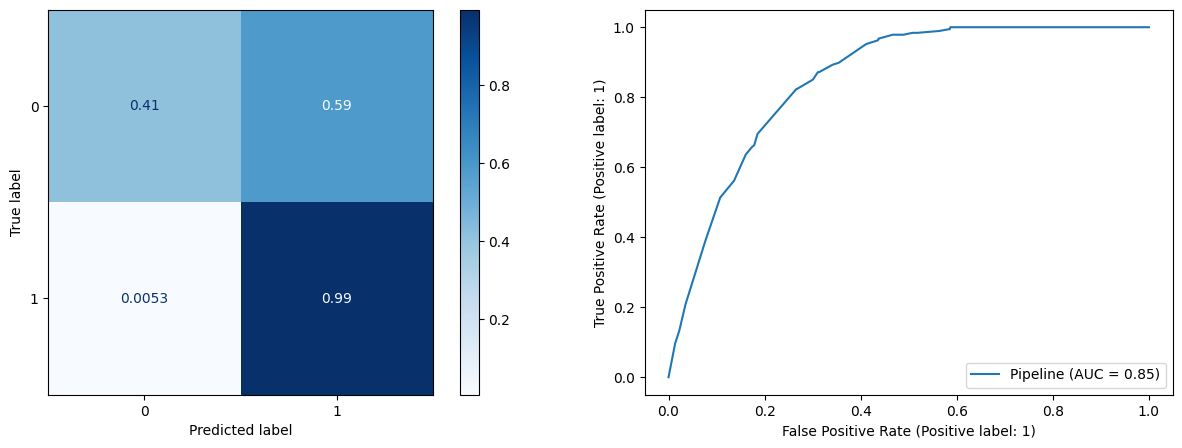

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.42      0.59      1216
           1       0.08      0.97      0.15        62

    accuracy                           0.45      1278
   macro avg       0.54      0.69      0.37      1278
weighted avg       0.95      0.45      0.57      1278



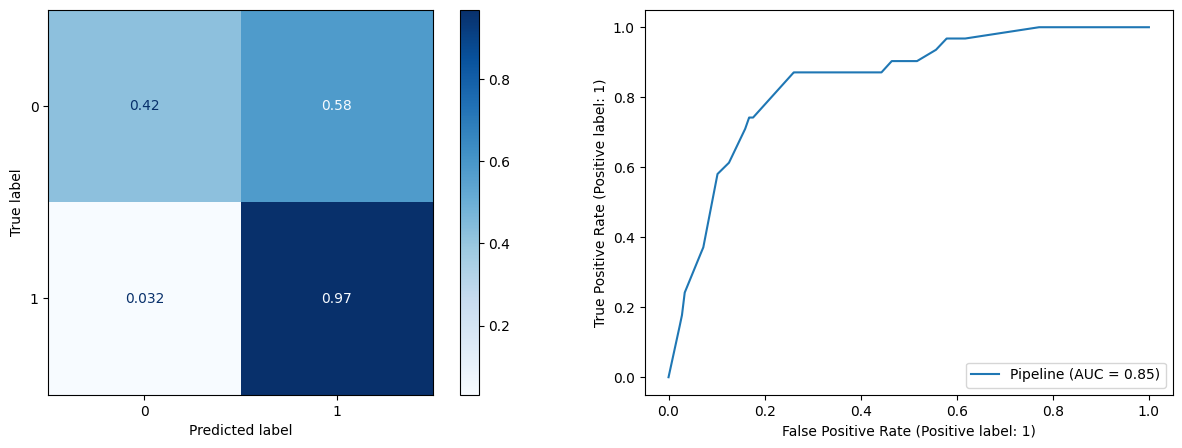

In [131]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_ab, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_ab, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')


### XGBBoost Classifier

In [132]:
xgb = XGBClassifier(random_state=42)
xgb_pipe = make_pipeline(col_transformer, xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'e...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [133]:
#Save the model's predictions for the train dataset
xgb_train_preds = xgb_pipe.predict(X_train)

#Save the model's predictions for the test dataset
xgb_test_preds = xgb_pipe.predict(X_test)

In [134]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, xgb_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, xgb_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3644
      Stroke       1.00      0.96      0.98       187

    accuracy                           1.00      3831
   macro avg       1.00      0.98      0.99      3831
weighted avg       1.00      1.00      1.00      3831

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      0.99      0.97      1216
      Stroke       0.18      0.05      0.08        62

    accuracy                           0.94      1278
   macro avg       0.56      0.52      0.52      1278
weighted avg       0.92      0.94      0.93      1278



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3644
           1       0.90      1.00      0.95       187

    accuracy                           0.99      3831
   macro avg       0.95      1.00      0.97      3831
weighted avg       1.00      0.99      0.99      3831



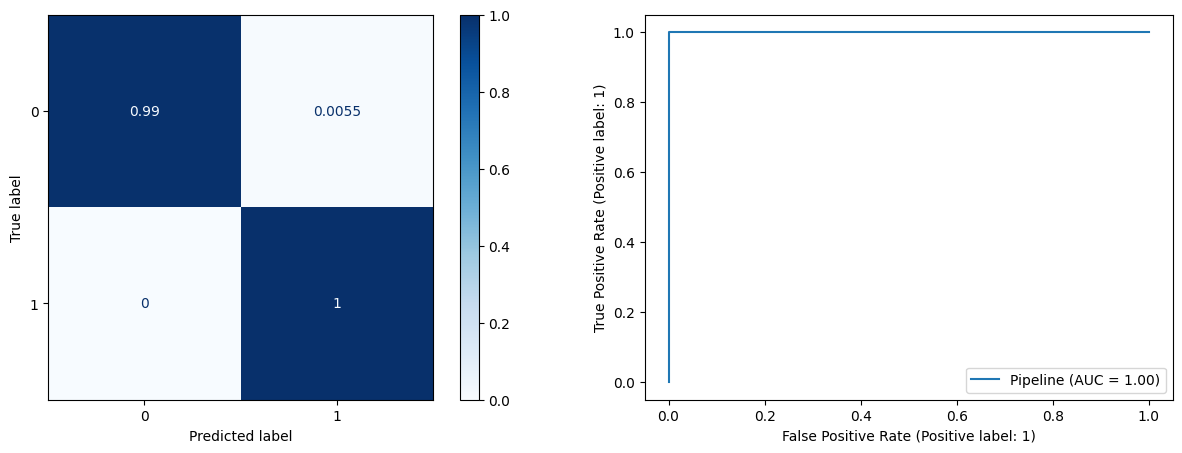

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1216
           1       0.18      0.23      0.20        62

    accuracy                           0.91      1278
   macro avg       0.57      0.59      0.58      1278
weighted avg       0.92      0.91      0.92      1278



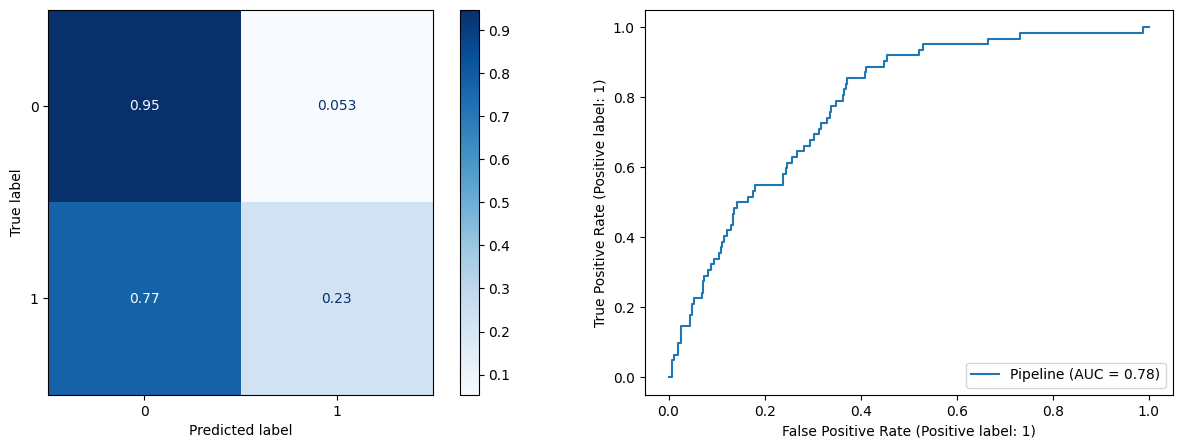

In [135]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(xgb_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(xgb_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

#### Tune Hyperparameters

In [136]:
#Display the hyperparameters
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['gender', 'ever_married', 'work_type', 'Residence_type',
          'smoking_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('xgbclassifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample

In [137]:
#Dictionary for the parameters
params = {'xgbclassifier__n_estimators': [10, 25, 50, 75, 100, 150],'xgbclassifier__random_state': [42]}

In [138]:
#Tune hyperparameters using GridSearchCV
xgb_gs = GridSearchCV(xgb_pipe, params)
xgb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             param_grid={'xgbclassifier__n_estimators': [10, 25, 50, 75, 100,
                                                         150],
                         'xgbclassifier__random_state': [42]})

In [139]:
xgb_gs.best_params_

{'xgbclassifier__n_estimators': 10, 'xgbclassifier__random_state': 42}

- Best Parameter: n_estimators 10

In [140]:
best_xgb = xgb_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3644
           1       0.49      0.69      0.57       187

    accuracy                           0.95      3831
   macro avg       0.74      0.83      0.77      3831
weighted avg       0.96      0.95      0.95      3831



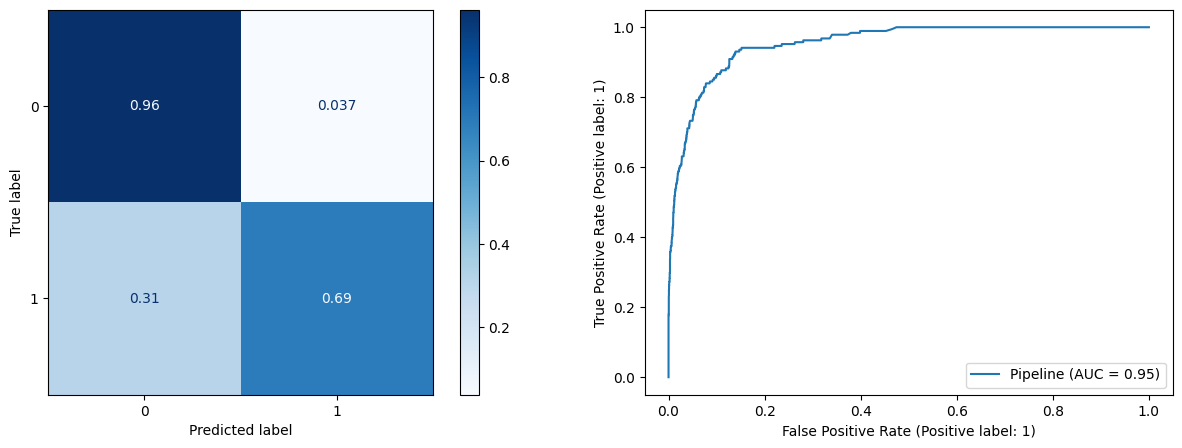

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1216
           1       0.19      0.31      0.24        62

    accuracy                           0.90      1278
   macro avg       0.58      0.62      0.59      1278
weighted avg       0.93      0.90      0.91      1278



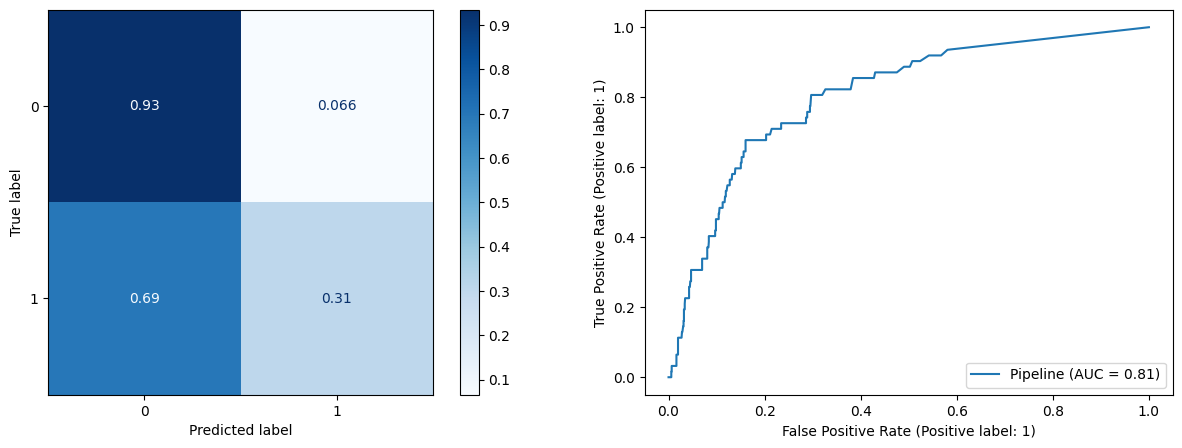

In [141]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_xgb, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_xgb, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')


#Final Observation and Recommendation

For this dataset I want to focus on two major components: Recall Score and Accuracy.
  - Recall Score: to make sure that the number of false positives are low, since this will make sure that patients who are high risk for stroke, are correctly predicted to have a stroke. This will ensure patients receive early stroke preventative care and treatments. False predictions can eventually lead to lower quality of life and in some cases death.


  


Since the predictions are for a stroke dataset, it is crucial to prioritize recall in order to correctly identify stroke cases. Accuracy is still important, but it's crucial to minimize false negatives (misclassifying stroke cases as non-strokes). Based on the provided information, the following models have relatively higher recall and accuracy scores:

  - LogisticRegression-Tuned:
      Accuracy Score: 95%
      Recall: 0%

  - GradientBoosting:
      Accuracy Score: 92%
      Recall: 23%

  - AdaBoost-Tuned:
      Accuracy Score: 45%
      Recall: 97%

  - XGB-Tuned:
      Accuracy Score: 90%
      Recall: 31%

Among these options, the model with the highest recall is AdaBoost-Tuned, achieving a recall of 97%. Although its accuracy is relatively low at 45%, it is important to note that prioritizing recall aims to capture as many stroke cases as possible, reducing the risk of false negatives. However, if you prefer a better balance between accuracy and recall, the GradientBoosting model may be a good choice, as it has an accuracy of 92% and a recall of 23%.

Ultimately, the best model choice depends on the specific requirements and priorities of the stroke dataset analysis. Consider the trade-off between recall and accuracy and choose the model that aligns best with your needs.


- This model can be further improved if we can collect more data so we have a balanced dataset.
- SMOTE (Synthetic Minority Over-sampling Technique): Since the dataset likely has an imbalance between stroke and non-stroke cases, SMOTE can be employed to generate synthetic samples of the minority class (in this case, stroke cases) to balance the class distribution. This technique can help prevent bias towards the majority class and improve the model's ability to recognize stroke cases.
- PCA(Principal Component Analysis) is a dimensionality reduction technique that can be utilized to reduce the number of features in the dataset while preserving most of the important information. By applying PCA, you can simplify the model and potentially enhance its performance by focusing on the most informative features.
- Implementing neural networks, particularly deep learning architectures, can be beneficial for complex and high-dimensional datasets like stroke prediction. Neural networks can automatically learn intricate patterns and relationships in the data, leading to potentially improved accuracy and recall.